In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Customer seg\Retail stoee\Retail Sales.csv')

In [3]:
df.head()

,DATE,Sales
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.tail()

,DATE,Sales
347,12/1/2020,7366
348,1/1/2021,5087
349,2/1/2021,4968
350,3/1/2021,5727
351,4/1/2021,5712


In [5]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

         Month  Sales
0     1/1/1992   1509
1     2/1/1992   1541
2     3/1/1992   1597
3     4/1/1992   1675
4     5/1/1992   1822
5     6/1/1992   1775
6     7/1/1992   1912
7     8/1/1992   1862
8     9/1/1992   1770
9    10/1/1992   1882
10   11/1/1992   1831
11   12/1/1992   2511
12    1/1/1993   1614
13    2/1/1993   1529
14    3/1/1993   1678
15    4/1/1993   1713
16    5/1/1993   1796
17    6/1/1993   1792
18    7/1/1993   1950
19    8/1/1993   1777
20    9/1/1993   1707
21   10/1/1993   1757
22   11/1/1993   1782
23   12/1/1993   2443
24    1/1/1994   1548
25    2/1/1994   1505
26    3/1/1994   1714
27    4/1/1994   1757
28    5/1/1994   1830
29    6/1/1994   1857
30    7/1/1994   1981
31    8/1/1994   1858
32    9/1/1994   1823
33   10/1/1994   1806
34   11/1/1994   1845
35   12/1/1994   2577
36    1/1/1995   1555
37    2/1/1995   1501
38    3/1/1995   1725
39    4/1/1995   1699
40    5/1/1995   1807
41    6/1/1995   1863
42    7/1/1995   1886
43    8/1/1995   1861
44    9/1/

In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.head()

,Month,Sales
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.head()

,Sales
Month,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [11]:
df.describe()

,Sales
count,352.000000
mean,3122.267045
std,1129.410411
min,1501.000000
25%,2140.000000
50%,2986.500000
75%,3804.750000
max,7366.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

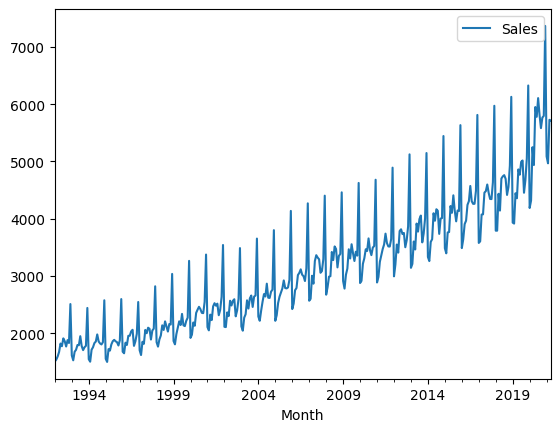

In [12]:
df.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(df['Sales'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic : 2.2633111688843477
p-value : 0.9989306816415178
#Lags Used : 16
Number of Observations Used : 335
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [17]:
#df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

# Perform seasonal difference (assuming your data has a seasonal period of 12)
#df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)
#df.head(14)

In [18]:
# Assuming 'df' is your DataFrame containing the 'sales' column

# Perform seasonal difference (assuming your data has a seasonal period of 12)
df['seasonal_diff'] = df['Sales'] - df['Sales'].shift(12)

# Perform first-order difference on the seasonally differenced data
df['seasonal_first_diff'] = df['seasonal_diff'].diff()

# Drop NaN values introduced by differencing
df['seasonal_first_diff'].dropna(inplace=True)

# Print the first few rows of the resulting differenced data
print(df.head(14))



            Sales  seasonal_diff  seasonal_first_diff
Month                                                
1992-01-01   1509            NaN                  NaN
1992-02-01   1541            NaN                  NaN
1992-03-01   1597            NaN                  NaN
1992-04-01   1675            NaN                  NaN
1992-05-01   1822            NaN                  NaN
1992-06-01   1775            NaN                  NaN
1992-07-01   1912            NaN                  NaN
1992-08-01   1862            NaN                  NaN
1992-09-01   1770            NaN                  NaN
1992-10-01   1882            NaN                  NaN
1992-11-01   1831            NaN                  NaN
1992-12-01   2511            NaN                  NaN
1993-01-01   1614          105.0                  NaN
1993-02-01   1529          -12.0               -117.0


In [19]:
adfuller_test(df['seasonal_first_diff'].dropna())

ADF Test Statistic : -5.14282669762236
p-value : 1.1489899165286529e-05
#Lags Used : 17
Number of Observations Used : 321
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

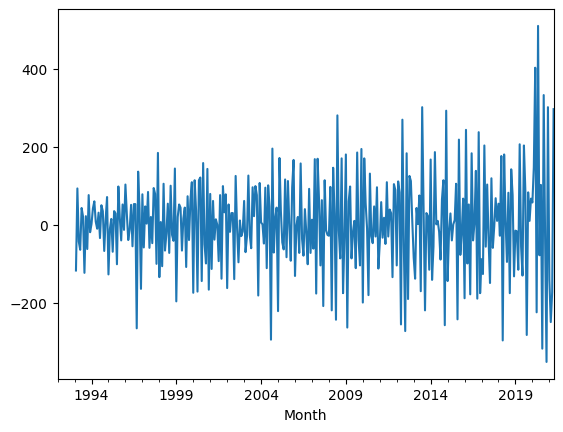

In [20]:
df['seasonal_first_diff'].plot()

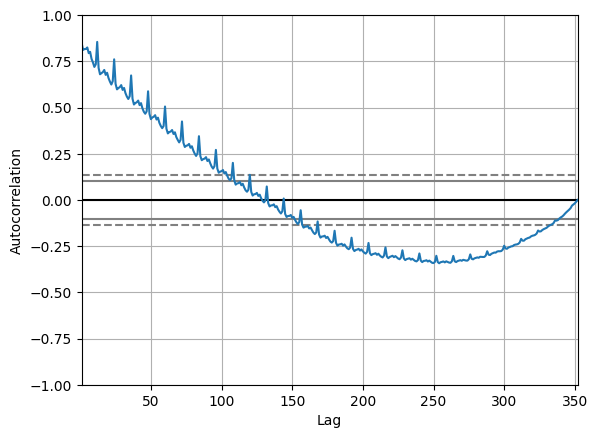

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Sales'])
plt.show()


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

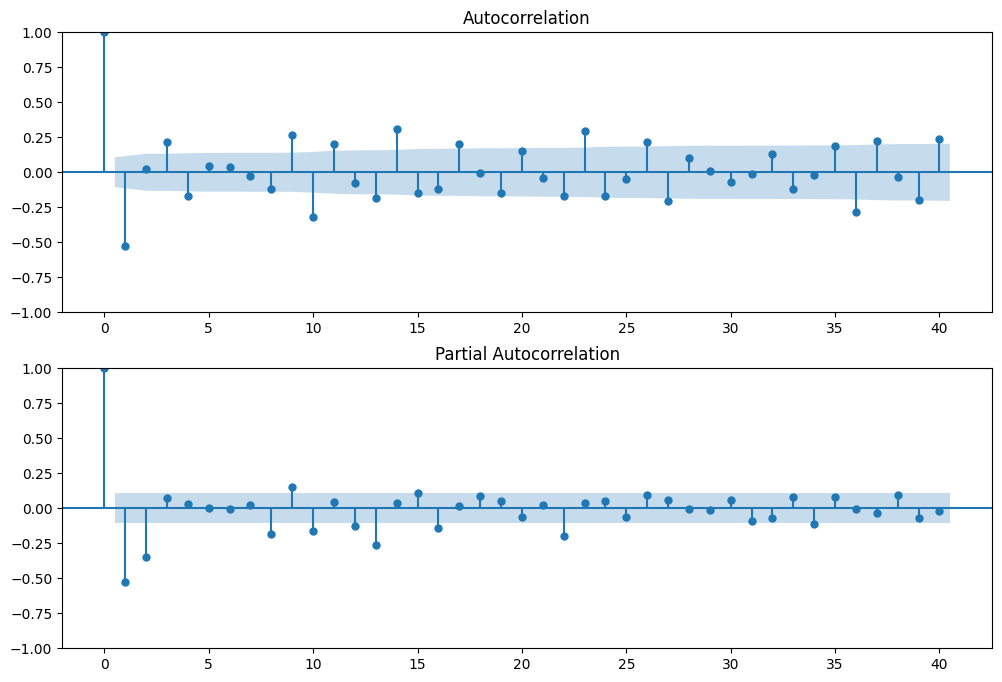

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonal_first_diff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonal_first_diff'].iloc[13:],lags=40,ax=ax2)

In [24]:
df.tail()

,Sales,seasonal_diff,seasonal_first_diff
Month,,,
2020-12-01,7366,1040.0,301.0
2021-01-01,5087,899.0,-141.0
2021-02-01,4968,650.0,-249.0
2021-03-01,5727,478.0,-172.0
2021-04-01,5712,774.0,296.0


In [28]:
import pmdarima as pm

# Assuming df has 'sales' column
# Assuming you have already applied differencing

# Seasonal Period (S)
S = 12  # Assuming monthly seasonality

# Perform auto_arima to select the best SARIMA model
model = pm.auto_arima(df['Sales'], seasonal=True, m=S, trace=True)

# Get the selected SARIMA order and seasonal order
order = model.order
seasonal_order = model.seasonal_order

print("Selected SARIMA Order:", order)
print("Selected Seasonal Order:", seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=4058.323, Time=1.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4236.877, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4122.304, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4096.324, Time=0.35 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=4058.738, Time=0.69 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=4065.569, Time=0.55 sec
 ARIMA(2,1,2)(2,1,1)[12]             : AIC=4059.992, Time=3.01 sec
 ARIMA(2,1,2)(1,1,2)[12]             : AIC=4060.220, Time=2.77 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=4086.434, Time=0.19 sec
 ARIMA(2,1,2)(0,1,2)[12]             : AIC=4058.356, Time=1.88 sec
 ARIMA(2,1,2)(2,1,0)[12]             : AIC=4064.804, Time=1.03 sec
 ARIMA(2,1,2)(2,1,2)[12]             : AIC=inf, Time=4.16 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=4068.964, Time=0.80 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=4057.408, Time=0.65 sec
 ARIMA(2,1,1)(0,1,1)[12]

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


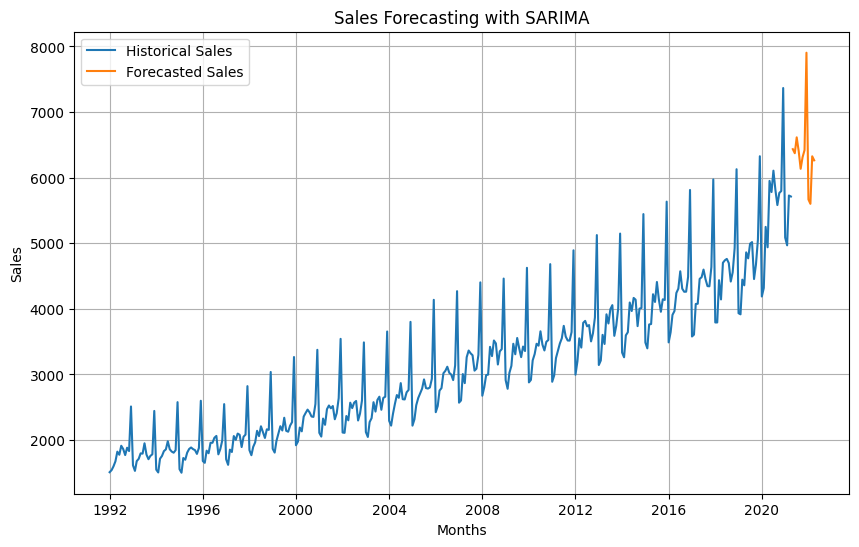

In [41]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming df has 'sales' column and 'months' as datetime index
# Assuming you have already applied differencing

# Define SARIMA parameters based on the selected order and seasonal_order
order = (1, 1, 0)  # SARIMA order
seasonal_order = (1, 1, 1, 12)  # Seasonal SARIMA order

# Train SARIMA model
model = SARIMAX(df['Sales'], order=order, seasonal_order=seasonal_order)
fit_model = model.fit(disp=False)

# Forecasting
forecast_steps = 12  # Forecasting for 12 months
forecast = fit_model.forecast(steps=forecast_steps)

# Create a new DataFrame for the forecasted period
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame({'Forecasted_Sales': forecast}, index=forecast_index)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Historical Sales')
plt.plot(forecast_df.index, forecast_df['Forecasted_Sales'], label='Forecasted Sales')
plt.title('Sales Forecasting with SARIMA')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
